In [41]:
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')

/var/folders/6f/cmgdlrnj78g5r1pl2dzz3y_r0000gn/T/ipykernel_72141/1337086538.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


In [42]:
import pandas as pd

file_path = '/Users/elmojuanara/Desktop/for_paper/virtual observation/panjang_5/15min/panjang/allscenarios.xlsx'  # Ganti dengan path file Anda
df = pd.read_excel(file_path)

In [43]:
print(df.head())

       time  scenario_1  scenario_2  scenario_3  scenario_4  scenario_5  \
0  0.014737     0.18247     0.18275     0.18247     0.18247     0.18247   
1  0.029474     0.18247     0.18360     0.18247     0.18247     0.18247   
2  0.044212     0.18247     0.18506     0.18247     0.18247     0.18247   
3  0.058949     0.18247     0.18719     0.18247     0.18247     0.18247   
4  0.073686     0.18247     0.19008     0.18247     0.18247     0.18247   

   scenario_6  scenario_7  scenario_8  
0     0.18247     0.18247     0.18247  
1     0.18247     0.18247     0.18247  
2     0.18247     0.18247     0.18247  
3     0.18247     0.18247     0.18247  
4     0.18247     0.18247     0.18247  


In [44]:
df.shape

(8143, 9)

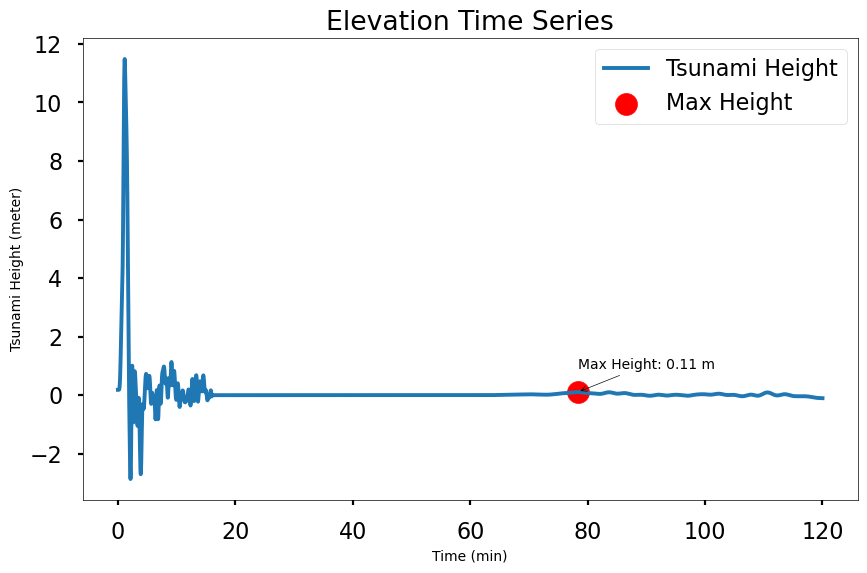

Maximum Tsunami Height between 16 and 120: 0.11 meters, at time 78.34586583


In [45]:
# Plot data time series
plt.figure(figsize=(10, 6))
plt.plot(df['time'], df['scenario_3'], label='Tsunami Height')
plt.xlabel('Time (min)', color='black')
plt.ylabel('Tsunami Height (meter)', color='black')
plt.title('Elevation Time Series')
plt.grid(False)  # Nonaktifkan grid
plt.gcf().set_facecolor('white')
plt.gca().set_facecolor('white')  # Atur latar belakang putih
plt.legend()

# Atur warna frame sumbu x dan y
plt.gca().spines['bottom'].set_color('black')  # Frame sumbu x (bawah)
plt.gca().spines['left'].set_color('black')    # Frame sumbu y (kiri)
plt.gca().spines['top'].set_color('black')  # Frame sumbu x (bawah)
plt.gca().spines['right'].set_color('black')    # Frame sumbu y (kiri)
plt.gca().spines['bottom'].set_linewidth(0.5)   # Ketebalan frame sumbu x
plt.gca().spines['left'].set_linewidth(0.5)     # Ketebalan frame sumbu y
plt.gca().spines['top'].set_linewidth(0.5)   # Ketebalan frame sumbu x
plt.gca().spines['right'].set_linewidth(0.5)     # Ketebalan frame sumbu y

# Mencari maksimum ketinggian tsunami di rentang waktu 3000-4000
start_time = 16
end_time = 120

filtered_data = df[(df['time'] >= start_time) & (df['time'] <= end_time)]
max_height_within_range = filtered_data['scenario_3'].max()
max_height_within_range_rounded = round(max_height_within_range, 2)  # Pembulatan hingga 2 desimal
max_time_within_range = filtered_data.loc[filtered_data['scenario_3'].idxmax(), 'time']

# Menambahkan notasi pada plot untuk nilai maksimum ketinggian tsunami di rentang waktu tersebut
plt.scatter(max_time_within_range, max_height_within_range, color='red', label='Max Height', s=250)
plt.annotate(f'Max Height: {max_height_within_range_rounded} m', xy=(max_time_within_range, max_height_within_range),
             xytext=(max_time_within_range + 0.05, max_height_within_range + 0.8),
             arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.legend()

# Menampilkan plot
plt.show()

# Menampilkan nilai maksimum ketinggian tsunami di rentang waktu tersebut
print(f"Maximum Tsunami Height between {start_time} and {end_time}: {max_height_within_range_rounded} meters, at time {max_time_within_range}")

In [46]:
#create a new dataframe with only the eta1 column
data = df.filter(['scenario_3'])
#convert the dataframe to a numpy array
dataset = data.values
#get the number of rows to train the model on
training_data_len = math.ceil( len(dataset) * .134)

training_data_len

1092

In [47]:
#scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.21238988],
       [0.21238988],
       [0.21238988],
       ...,
       [0.19249478],
       [0.19248293],
       [0.19247108]])

In [48]:
#create the training data set
#create the scaled training data set
train_data = scaled_data[0:training_data_len , :]
#split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(6, len(train_data)):
    x_train.append(train_data[i-6:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 6:
        print(x_train)
        print(y_train)
        print()

[array([0.21238988, 0.21238988, 0.21238988, 0.21238988, 0.21238988,
       0.21239058])]
[0.21239266848555738]



In [49]:
#convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [50]:
#reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1086, 6, 1)

In [51]:
#build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [52]:
#compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [53]:
#train the model
model.fit(x_train, y_train, batch_size=1, epochs=7)

Epoch 1/7
1086/1086 [==============================] - 13s 8ms/step - loss: 0.0026
Epoch 2/7
1086/1086 [==============================] - 9s 8ms/step - loss: 0.0014
Epoch 3/7
1086/1086 [==============================] - 7s 6ms/step - loss: 9.5882e-04
Epoch 4/7
1086/1086 [==============================] - 7s 7ms/step - loss: 8.4531e-04
Epoch 5/7
1086/1086 [==============================] - 9s 8ms/step - loss: 7.1011e-04
Epoch 6/7
1086/1086 [==============================] - 7s 7ms/step - loss: 4.2776e-04
Epoch 7/7
1086/1086 [==============================] - 7s 7ms/step - loss: 3.4654e-04


In [54]:
#create the testing data set
#create a new array containing scaled values from index 212 to 272
test_data = scaled_data[training_data_len - 6: , :]
#create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(6, len(test_data)):
    x_test.append(test_data[i-6:i, 0])

In [55]:
#convert the data to a numpy array
x_test = np.array(x_test)

In [56]:
#reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [57]:
#get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

221/221 [==============================] - 2s 4ms/step


In [58]:
#get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test)**2)))
rmse

0.053068967765887924

/var/folders/6f/cmgdlrnj78g5r1pl2dzz3y_r0000gn/T/ipykernel_72141/1824690134.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


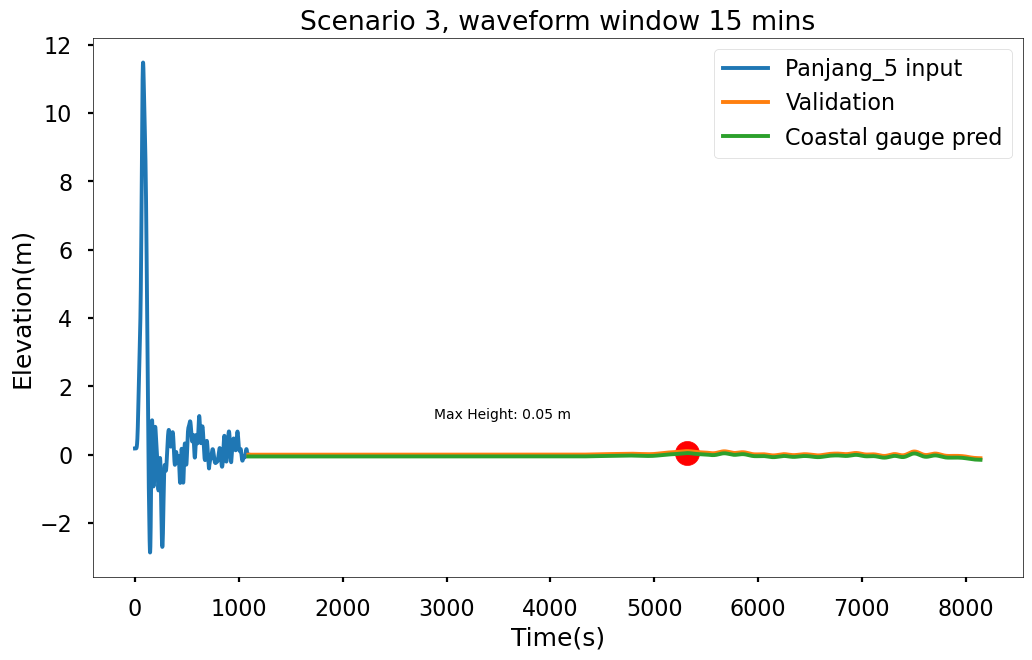

Maximum Tsunami Height between 16 and 120: 0.04785043001174927 meters, at time 78.34586583


In [59]:
#plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

max_height_within_range = valid['Predictions'].max()
max_index = valid['Predictions'].idxmax()

# Membulatkan nilai max_height_within_range menjadi 2 angka di belakang koma
max_height_formatted = "{:.2f}".format(max_height_within_range)

#visualize the data
plt.figure(figsize=(12,7))
plt.title('Scenario 3, waveform window 15 mins')
plt.xlabel('Time(s)', fontsize=18)
plt.ylabel('Elevation(m)', fontsize=18)
plt.plot(train['scenario_3'])
plt.plot(valid[['scenario_3', 'Predictions']])
plt.grid(False)  # Nonaktifkan grid
plt.gcf().set_facecolor('white')
plt.gca().set_facecolor('white')  # Atur latar belakang putih
plt.legend(['Panjang_5 input', 'Validation', 'Coastal gauge pred'], loc='upper right')
plt.scatter(max_index, max_height_within_range, color='red', s=300)  # Mengatur ukuran titik scatter

# Atur warna frame sumbu x dan y
plt.gca().spines['bottom'].set_color('black')  # Frame sumbu x (bawah)
plt.gca().spines['left'].set_color('black')    # Frame sumbu y (kiri)
plt.gca().spines['top'].set_color('black')  # Frame sumbu x (bawah)
plt.gca().spines['right'].set_color('black')    # Frame sumbu y (kiri)
plt.gca().spines['bottom'].set_linewidth(0.5)   # Ketebalan frame sumbu x
plt.gca().spines['left'].set_linewidth(0.5)     # Ketebalan frame sumbu y
plt.gca().spines['top'].set_linewidth(0.5)   # Ketebalan frame sumbu x
plt.gca().spines['right'].set_linewidth(0.5)     # Ketebalan frame sumbu y


# Menggunakan nilai yang sudah diformat dalam fungsi annotate
plt.annotate(f'Max Height: {max_height_formatted} m', xy=(max_time_within_range, max_height_within_range),
             xytext=(max_time_within_range + 2800, max_height_within_range + 1))
plt.savefig('waveform_prediction_sc3_panjang5_panjang.png')  # Menyimpan plot dengan nama file 'waveform_prediction_plot.png'
plt.show()

# Menampilkan nilai maksimum ketinggian tsunami di rentang waktu tersebut
print(f"Maximum Tsunami Height between {start_time} and {end_time}: {max_height_within_range} meters, at time {max_time_within_range}")

In [60]:
#show the valid and predicted prices
valid

scenario_3  Predictions
1092     0.00000    -0.052413
1093     0.00000    -0.052413
1094     0.00000    -0.052413
1095     0.00000    -0.052413
1096     0.00000    -0.052413
...          ...          ...
8138    -0.10263    -0.148819
8139    -0.10278    -0.148972
8140    -0.10294    -0.149120
8141    -0.10311    -0.149270
8142    -0.10328    -0.149431

[7051 rows x 2 columns]